In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv('/Users/adityasrivatsav/Documents/GitHub/Machinelearning/Netflix/netflix_titles.csv')


In [3]:
data.head(5) #first five rows of the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.describe() #basic stats of the data

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
data.shape #dimensions of the dataset

(8807, 12)

In [6]:
data.columns #column names
data.info() #data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Calculate the sum of missing entries in the dataset
data.isnull().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
#removed the rows of the columns director and cast
data = data.dropna(subset = ['director','cast','country','rating'])
data.isnull().sum(axis=0)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [9]:
#replace the null values with most common value in that column
common_value=data['duration'].mode()[0]
data_replacement = data['duration'].fillna(common_value, inplace=True)
data.isnull().sum(axis=0)
df = data.copy()

/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_8745/2894772047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_replacement = data['duration'].fillna(common_value, inplace=True)


In [10]:
#converting into categorial data
df['type'] = data['type'].astype('category').cat.codes
df['rating'] = data['rating'].astype('category').cat.codes
df['country'] = data['country'].astype('category').cat.codes
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,0,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",536,"September 24, 2021",1993,11,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,1,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",409,"September 24, 2021",2021,9,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,0,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",490,"September 24, 2021",2021,7,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,0,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",167,"September 23, 2021",2021,11,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,0,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",195,"September 21, 2021",1998,9,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,0,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",490,"September 20, 2021",2010,7,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,0,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",490,"September 19, 2021",2013,7,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,0,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...",545,"September 19, 2021",2013,7,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,0,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...",80,"September 16, 2021",2017,7,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
41,s42,0,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",490,"September 16, 2021",1975,6,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...


In [11]:
# Counts the no. of movies in each type
type_counts = data['type'].value_counts()

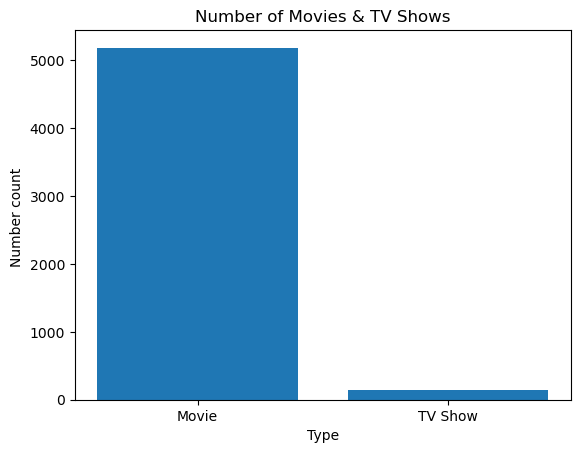

In [12]:
# Create a bar plot of the movie counts by type
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Number count ')
plt.title('Number of Movies & TV Shows')
plt.show()

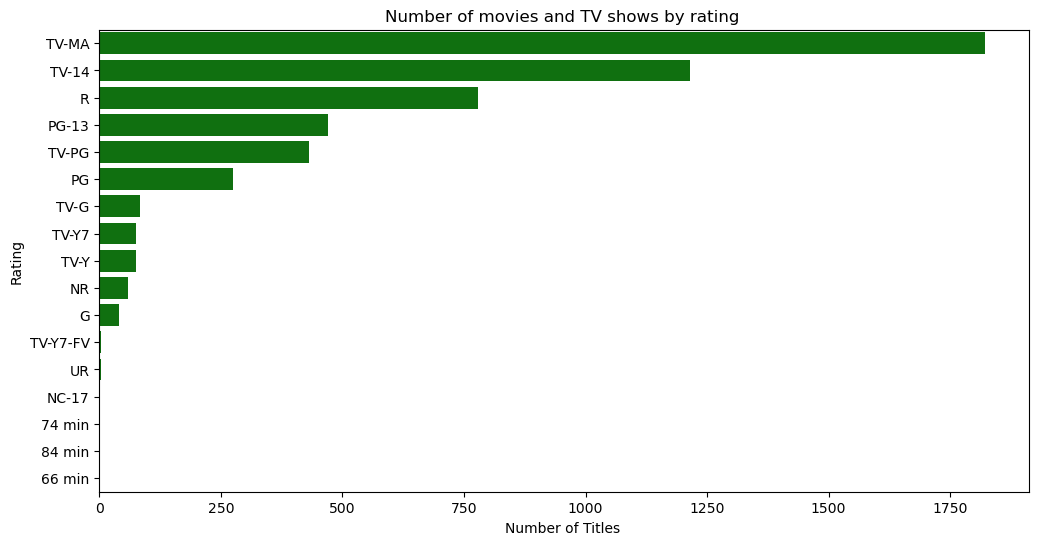

In [13]:
plt.figure(figsize=(12,6))
rating_data = data.groupby('rating')['title'].count().sort_values(ascending = False)
sns.barplot(x=rating_data.values, y=rating_data.index, color = 'green')
plt.title('Number of movies and TV shows by rating ')
plt.xlabel('Number of Titles ')
plt.ylabel('Rating')
plt.show()

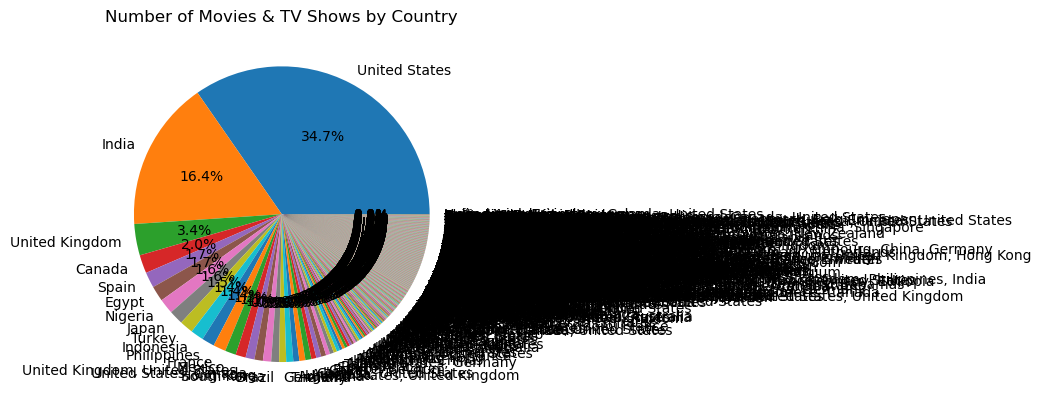

In [14]:
# pie chart of the number of movies and TV shows country wise
country_data = data['country'].value_counts()
plt.pie(country_data.values, labels=country_data.index, autopct='%1.1f%%')
plt.title('Number of Movies & TV Shows by Country')
plt.show()

<Axes: xlabel='release_year'>

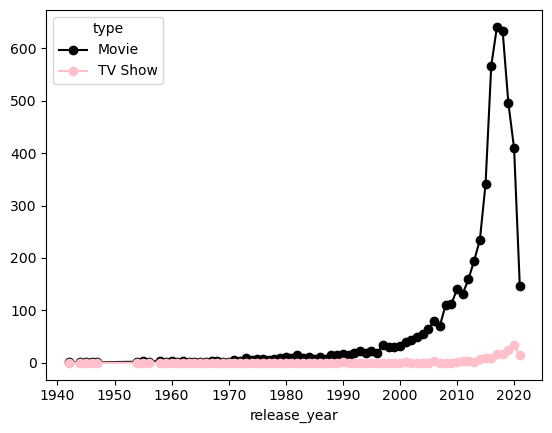

In [15]:
content_counts = data.groupby(["release_year", "type"]).size().unstack(fill_value = 0)
content_counts.plot(kind = 'line', marker='o',color=['black','pink'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


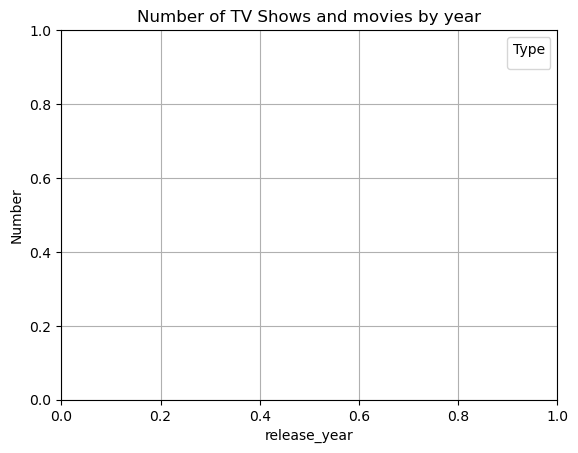

In [16]:
plt.xlabel("release_year")
plt.ylabel('Number')
plt.title('Number of TV Shows and movies by year')
plt.legend(title='Type')
plt.grid(True)
plt.show()

In [17]:
listed_in_counts = data['listed_in'].value_counts()
top_10 = listed_in_counts.head(10)

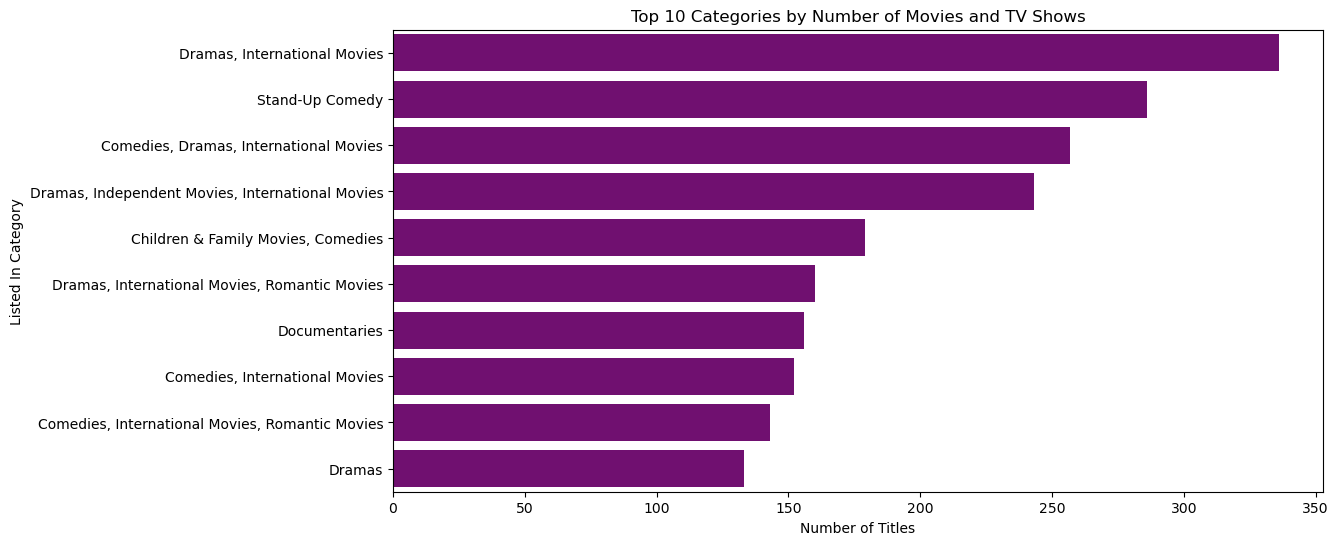

In [18]:
# Create a bar plot of the top 10 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index,color='purple')
plt.xlabel('Number of Titles')
plt.ylabel('Listed In Category')
plt.title('Top 10 Categories by Number of Movies and TV Shows')
plt.show()

In [19]:
# Count the number of movies and TV shows directed by each director
director_data = data['director'].value_counts()

# Get the top 10 directors with the most movies and TV shows
top_10_directors = director_data.head(10)

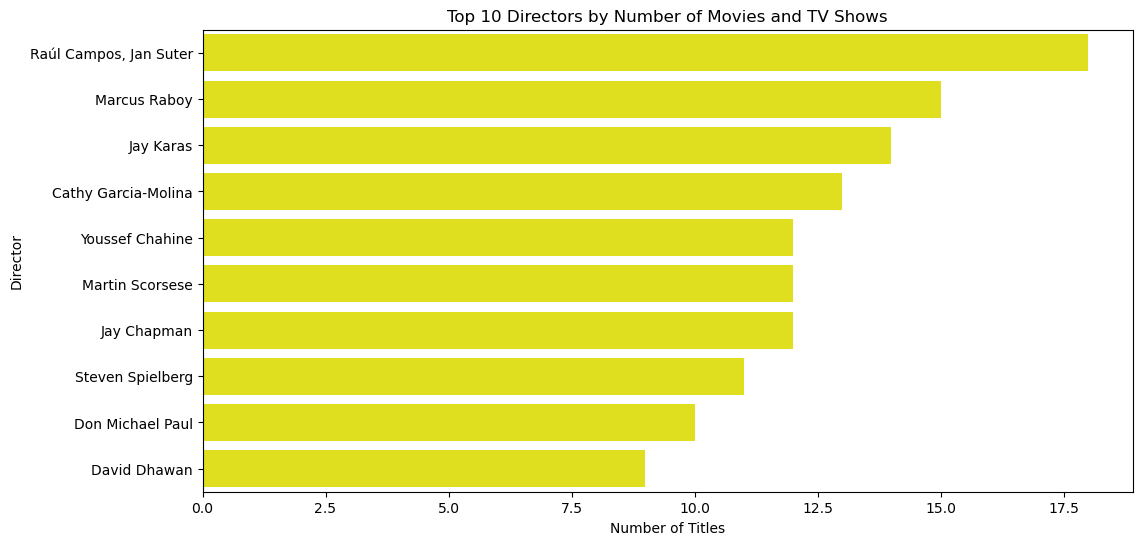

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,color='yellow')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Movies and TV Shows')
plt.show()